In [1]:
import glob
import os
import json
import pickle
import yaml
import math
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import pyarrow.parquet as pq
#from sklearn.metrics import auc, roc_curve
#from scipy.special import softmax
import hist as hist2
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import utils_farouk2 as utils
plt.rcParams.update({"font.size": 20})

year = "2018"
channels = ["mu", "ele"]
samplesMC = ["TTbar", "WJetsLNu", "DYJets", ]

In [2]:
samples_dir="/uscms/home/jieun201/nobackup/YOURWORKINGAREA/data_compar_may2/" 
samplesMC = [ "TTbar", "WJetsLNu", "DYJets", ]
fakeMC= utils.event_skimmer_noInference(year, channels, samples_dir, samplesMC, "all", add_qcd_score=False, add_top_score=False, add_inclusive_score=False)

luminosity 59781.96
---> Accumulating event weights.
sample DYJetsToLL_M-10to50
xsec*lum 1112542275.6
metadata {'DYJetsToLL_M-10to50': {'mc': 146, '2018': {'sumgenweight': 1444515.0, 'cutflows': {'ele': {'all': 1444515.0, 'Trigger': 1777.0, 'METFilters': 1777.0, 'GreaterTwoFatJets': 23.0, 'LeptonCut': 11.0, 'metRevertCut': 5.0, 'HEMCleaning': 4.0}, 'mu': {'all': 1444515.0, 'Trigger': 6125.0, 'METFilters': 6124.0, 'GreaterTwoFatJets': 23.0, 'LeptonCut': 11.0, 'metRevertCut': 3.0, 'HEMCleaning': 3.0}}}}}
metadata {'DYJetsToLL_M-10to50': {'mc': 580, '2018': {'sumgenweight': 5803432.0, 'cutflows': {'ele': {'all': 5803432.0, 'Trigger': 7632.0, 'METFilters': 7631.0, 'GreaterTwoFatJets': 70.0, 'LeptonCut': 35.0, 'metRevertCut': 12.0, 'HEMCleaning': 9.0}, 'mu': {'all': 5803432.0, 'Trigger': 24796.0, 'METFilters': 24791.0, 'GreaterTwoFatJets': 95.0, 'LeptonCut': 45.0, 'metRevertCut': 12.0, 'HEMCleaning': 9.0}}}}}
metadata {'DYJetsToLL_M-10to50': {'mc': 697, '2018': {'sumgenweight': 7006069.0, '

In [3]:
ch = 'mu'
bins_PT = [30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,300]
#bins_PT = [35,40,45,50,55,60,65,70,75,80,85,90,95,100]
bins_ETA = [0,0.5,1,1.5,2,2.5]

In [4]:
df_MC_tight_TT = fakeMC[ch]['TTbar']
df_MC_tight_TTbar = df_MC_tight_TT[    (df_MC_tight_TT["lep_fj_dr"] < 0.8) &  (df_MC_tight_TT["lep_fj_dr"] > 0.03) & (df_MC_tight_TT["numberLeptons"] == 1) 
& (df_MC_tight_TT["numberBJets_Medium_OutsideFatJets"] == 0) # & (df_MC_tight_TT["n_good_muons"] == 1)  & (df_MC_tight_TT["n_good_electrons"] == 0) 
& (   (df_MC_tight_TT['lep_pt'] < 55)  | (    (df_MC_tight_TT['lep_pt'] >= 55)  & (df_MC_tight_TT['lep_misolation'] < 0.2) )    ) 
]

df_MC_tight_WJ = fakeMC[ch]['WJetsLNu']
df_MC_tight_WJets = df_MC_tight_WJ[    (df_MC_tight_WJ["lep_fj_dr"] < 0.8) &  (df_MC_tight_WJ["lep_fj_dr"] > 0.03) & (df_MC_tight_WJ["numberLeptons"] == 1) 
& (df_MC_tight_WJ["numberBJets_Medium_OutsideFatJets"] == 0)  #& (df_MC_tight_WJ["n_good_muons"] == 1) & (df_MC_tight_WJ["n_good_electrons"] == 0)
& (   (df_MC_tight_WJ['lep_pt'] < 55)  | (    (df_MC_tight_WJ['lep_pt'] >= 55)  & (df_MC_tight_WJ['lep_misolation'] < 0.2) )    ) 
]

#put b ack old dy
df_MC_tight_DY = fakeMC[ch]['DYJets']
df_MC_tight_DYJets = df_MC_tight_DY[    (df_MC_tight_DY["lep_fj_dr"] < 0.8) &  (df_MC_tight_DY["lep_fj_dr"] > 0.03)
& (df_MC_tight_DY["numberLeptons"] == 1) #  & (df_MC_tight_DY["n_good_muons"] == 1) & (df_MC_tight_DY["n_good_electrons"] == 0)
& (df_MC_tight_DY["numberBJets_Medium_OutsideFatJets"] == 0)
& (   (df_MC_tight_DY['lep_pt'] < 55)  | (    (df_MC_tight_DY['lep_pt'] >= 55)  & (df_MC_tight_DY['lep_misolation'] < 0.2) )    ) 
]

In [5]:
df_MC_tight = pd.concat([df_MC_tight_TTbar,df_MC_tight_WJets,df_MC_tight_DYJets])
#df_MC_tight['lep_pt'].hist()

In [6]:
df_MC_tight['event_weight'].sum()

29478.814617739452

In [7]:
grouped_MC_tight = df_MC_tight.groupby(
        [
        pd.cut(df_MC_tight["lep_pt"], bins_PT),
    ]
#    observed=False , # Added this because the default will change in the future
)
grouped_MC_tight['event_weight'].sum()  


lep_pt
(30, 40]       946.430059
(40, 50]      1192.501780
(50, 60]      1794.090205
(60, 70]      2294.025916
(70, 80]      2299.784558
(80, 90]      2154.992041
(90, 100]     1937.316637
(100, 110]    1780.492593
(110, 120]    1581.567149
(120, 130]    1475.915447
(130, 140]    1396.886172
(140, 150]    1231.437851
(150, 160]    1265.317533
(160, 170]    1214.650889
(170, 180]    1140.496139
(180, 190]     938.043517
(190, 200]     794.690542
(200, 300]    3278.069285
Name: event_weight, dtype: float64

In [8]:
df_MC_loose_TT = fakeMC[ch]['TTbar']
df_MC_loose_TTbar = df_MC_loose_TT[    (df_MC_loose_TT["lep_fj_dr_loose"] < 0.8) &  (df_MC_loose_TT["lep_fj_dr_loose"] > 0.03) & (df_MC_loose_TT["numberLeptons_loose"] == 1) 
& (df_MC_loose_TT["numberBJets_Medium_OutsideFatJets_loose"] == 0)]

df_MC_loose_WJ = fakeMC[ch]['WJetsLNu']
df_MC_loose_WJets = df_MC_loose_WJ[    (df_MC_loose_WJ["lep_fj_dr_loose"] < 0.8) &  (df_MC_loose_WJ["lep_fj_dr_loose"] > 0.03) & (df_MC_loose_WJ["numberLeptons_loose"] == 1) 
& (df_MC_loose_WJ["numberBJets_Medium_OutsideFatJets_loose"] == 0)]

df_MC_loose_DY = fakeMC[ch]['DYJets']
df_MC_loose_DYJets = df_MC_loose_DY[    (df_MC_loose_DY["lep_fj_dr_loose"] < 0.8) &  (df_MC_loose_DY["lep_fj_dr_loose"] > 0.03) & (df_MC_loose_DY["numberLeptons_loose"] == 1)  
& (df_MC_loose_DY["numberBJets_Medium_OutsideFatJets_loose"] == 0)]

df_MC_loose = pd.concat([df_MC_loose_TTbar,df_MC_loose_WJets,df_MC_loose_DYJets])

In [9]:
grouped_MC_loose = df_MC_loose.groupby(
        [
        pd.cut(df_MC_loose["lep_pt_loose"], bins_PT),
    ]
#    observed=False , # Added this because the default will change in the future
)
grouped_MC_loose['event_weight'].sum()  


lep_pt_loose
(30, 40]      1436.442391
(40, 50]      1788.532004
(50, 60]      4352.092440
(60, 70]      3876.513324
(70, 80]      3414.546456
(80, 90]      2954.184652
(90, 100]     2489.112901
(100, 110]    2190.225547
(110, 120]    1873.405338
(120, 130]    1672.211575
(130, 140]    1541.853715
(140, 150]    1331.086808
(150, 160]    1341.198318
(160, 170]    1272.974914
(170, 180]    1182.775668
(180, 190]     972.168577
(190, 200]     821.241252
(200, 300]    3360.786448
Name: event_weight, dtype: float64

In [10]:
grouped_MC_tight['event_weight'].sum()/grouped_MC_loose['event_weight'].sum()      #sanity check that tight is less than loose

lep_pt
(30, 40]      0.658871
(40, 50]      0.666749
(50, 60]      0.412236
(60, 70]      0.591776
(70, 80]      0.673526
(80, 90]      0.729471
(90, 100]     0.778316
(100, 110]    0.812927
(110, 120]    0.844220
(120, 130]    0.882613
(130, 140]    0.905978
(140, 150]    0.925137
(150, 160]    0.943423
(160, 170]    0.954183
(170, 180]    0.964254
(180, 190]    0.964898
(190, 200]    0.967670
(200, 300]    0.975388
Name: event_weight, dtype: float64

# this is for DATA

In [11]:
samples_dir="/uscms/home/jieun201/nobackup/YOURWORKINGAREA/data_compar_may2/" 
samplesData = [ "Data", ]
fakesRate_Data= utils.event_skimmer_noInference(year, channels, samples_dir, samplesData, "all", add_qcd_score=False, add_top_score=False, add_inclusive_score=False)

luminosity 59781.96
ATTENTION!: DYJetsToLL_M-10to50 will be skipped
ATTENTION!: DYJetsToLL_M-50_HT-100to200 will be skipped
ATTENTION!: DYJetsToLL_M-50_HT-1200to2500 will be skipped
ATTENTION!: DYJetsToLL_M-50_HT-200to400 will be skipped
ATTENTION!: DYJetsToLL_M-50_HT-2500toInf will be skipped
ATTENTION!: DYJetsToLL_M-50_HT-400to600 will be skipped
ATTENTION!: DYJetsToLL_M-50_HT-600to800 will be skipped
ATTENTION!: DYJetsToLL_M-50_HT-70to100 will be skipped
ATTENTION!: DYJetsToLL_M-50_HT-800to1200 will be skipped
ATTENTION!: TTTo2L2Nu will be skipped
ATTENTION!: TTToHadronic will be skipped
ATTENTION!: TTToSemiLeptonic will be skipped
ATTENTION!: WJetsToLNu_HT-100To200 will be skipped
ATTENTION!: WJetsToLNu_HT-1200To2500 will be skipped
ATTENTION!: WJetsToLNu_HT-200To400 will be skipped
ATTENTION!: WJetsToLNu_HT-2500ToInf will be skipped
ATTENTION!: WJetsToLNu_HT-400To600 will be skipped
ATTENTION!: WJetsToLNu_HT-600To800 will be skipped
ATTENTION!: WJetsToLNu_HT-800To1200 will be skip

In [12]:
df_Data_Tight = fakesRate_Data[ch]["Data"]
df_Data_Tight = df_Data_Tight[ (df_Data_Tight["lep_fj_dr"] < 0.8) &  (df_Data_Tight["lep_fj_dr"] > 0.03) & (df_Data_Tight["numberLeptons"] == 1)
& (df_Data_Tight["numberBJets_Medium_OutsideFatJets"] == 0)# & (df_Data_Tight["met_pt"] < 30)
& (   (df_Data_Tight['lep_pt'] < 55)  | (    (df_Data_Tight['lep_pt'] >= 55)  & (df_Data_Tight['lep_misolation'] < 0.2) )    )
]

grouped_Data_Tight = df_Data_Tight.groupby(
        [
        pd.cut(df_Data_Tight["lep_pt"], bins_PT),
    ]
#    observed=False , # Added this because the default will change in the future
)
grouped_Data_Tight['event_weight'].sum()  


lep_pt
(30, 40]      1290.0
(40, 50]      1459.0
(50, 60]      3208.0
(60, 70]      4386.0
(70, 80]      4461.0
(80, 90]      4109.0
(90, 100]     3901.0
(100, 110]    3544.0
(110, 120]    3309.0
(120, 130]    2883.0
(130, 140]    2535.0
(140, 150]    2279.0
(150, 160]    2110.0
(160, 170]    2004.0
(170, 180]    1757.0
(180, 190]    1461.0
(190, 200]    1132.0
(200, 300]    3998.0
Name: event_weight, dtype: float32

In [13]:
df_Data_loose = fakesRate_Data[ch]["Data"]
df_Data_loose = df_Data_loose[ (df_Data_loose["lep_fj_dr_loose"] < 0.8) &  (df_Data_loose["lep_fj_dr_loose"] > 0.03) & (df_Data_loose["numberLeptons_loose"] == 1) &
(df_Data_loose["numberBJets_Medium_OutsideFatJets_loose"] == 0)
#& (   (df_Data_loose['lep_pt_loose'] < 55)  | (    (df_Data_loose['lep_pt_loose'] >= 55)  & (df_Data_loose['lep_misolation_loose'] < 0.2) )    )
]
#df_Data_loose['lep_pt'].hist()

In [14]:
grouped_Data_loose = df_Data_loose.groupby(
        [
        pd.cut(df_Data_loose["lep_pt_loose"], bins_PT),
    ]
#    observed=False , # Added this because the default will change in the future
)
grouped_Data_loose['event_weight'].sum()  


lep_pt_loose
(30, 40]       12162.0
(40, 50]       21170.0
(50, 60]      361291.0
(60, 70]      234528.0
(70, 80]      151242.0
(80, 90]       98348.0
(90, 100]      63600.0
(100, 110]     42297.0
(110, 120]     27265.0
(120, 130]     17043.0
(130, 140]     11211.0
(140, 150]      7628.0
(150, 160]      5498.0
(160, 170]      4186.0
(170, 180]      3116.0
(180, 190]      2361.0
(190, 200]      1744.0
(200, 300]      5508.0
Name: event_weight, dtype: float32

In [15]:
grouped_Data_Tight['event_weight'].sum()  

lep_pt
(30, 40]      1290.0
(40, 50]      1459.0
(50, 60]      3208.0
(60, 70]      4386.0
(70, 80]      4461.0
(80, 90]      4109.0
(90, 100]     3901.0
(100, 110]    3544.0
(110, 120]    3309.0
(120, 130]    2883.0
(130, 140]    2535.0
(140, 150]    2279.0
(150, 160]    2110.0
(160, 170]    2004.0
(170, 180]    1757.0
(180, 190]    1461.0
(190, 200]    1132.0
(200, 300]    3998.0
Name: event_weight, dtype: float32

In [16]:
fakeRate_ele_withoutEWK = pd.DataFrame(grouped_Data_Tight['event_weight'].sum()/grouped_Data_loose['event_weight'].sum()  )
fakeRate_ele_withoutEWK

,event_weight
lep_pt,
"(30, 40]",0.106068
"(40, 50]",0.068918
"(50, 60]",0.008879
"(60, 70]",0.018701
"(70, 80]",0.029496
"(80, 90]",0.041780
"(90, 100]",0.061336
"(100, 110]",0.083788
"(110, 120]",0.121364


In [17]:
fakeRate_ele_withEWK =pd.DataFrame( (grouped_Data_Tight['event_weight'].sum()-grouped_MC_tight['event_weight'].sum())
                                  /
                                  (grouped_Data_loose['event_weight'].sum()-grouped_MC_loose['event_weight'].sum())
                                  )


In [18]:
fakeRate_ele_withEWK

,event_weight
lep_pt,
"(30, 40]",0.032033
"(40, 50]",0.013750
"(50, 60]",0.003961
"(60, 70]",0.009070
"(70, 80]",0.014620
"(80, 90]",0.020484
"(90, 100]",0.032133
"(100, 110]",0.043970
"(110, 120]",0.068032


In [19]:
num = np.array(grouped_Data_Tight['event_weight'].sum() )
num

array([1290., 1459., 3208., 4386., 4461., 4109., 3901., 3544., 3309.,
       2883., 2535., 2279., 2110., 2004., 1757., 1461., 1132., 3998.],
      dtype=float32)

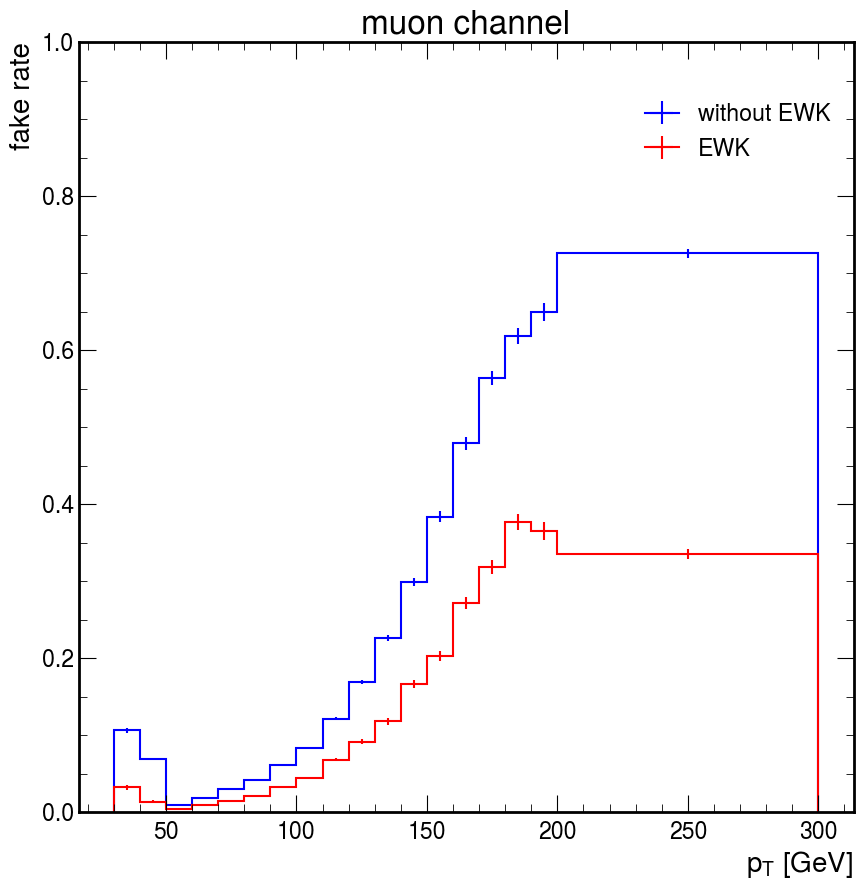

In [23]:
from coffea.hist import clopper_pearson_interval

num = np.array( grouped_Data_Tight['event_weight'].sum() )
denom = np.array(grouped_Data_loose['event_weight'].sum() )


err = abs(clopper_pearson_interval(num, denom) - num / denom)

fig, ax = plt.subplots()
hep.histplot(num/ denom, bins = bins_PT, yerr=err, ax=ax, histtype='step', label='without EWK', color='blue')


numEWK = np.array([
    (grouped_Data_Tight['event_weight'].sum()-grouped_MC_tight['event_weight'].sum())
])

denomEWK =np.array([
(grouped_Data_loose['event_weight'].sum()-grouped_MC_loose['event_weight'].sum())
])

#errEWK = abs(clopper_pearson_interval(numEWK, denomEWK) - numEWK / denomEWK)
errEWK = abs(clopper_pearson_interval(numEWK, denomEWK) - numEWK / denomEWK)
hep.histplot(numEWK/denomEWK, bins = bins_PT,yerr=err,ax=ax, histtype='step', label='EWK', color='red')

ax.set_ylabel("fake rate")
ax.set_xlabel("$p_{T}$ [GeV]")
ax.set_title('muon channel')
ax.set_ylim([0,1])
ax.legend(title=f" ")

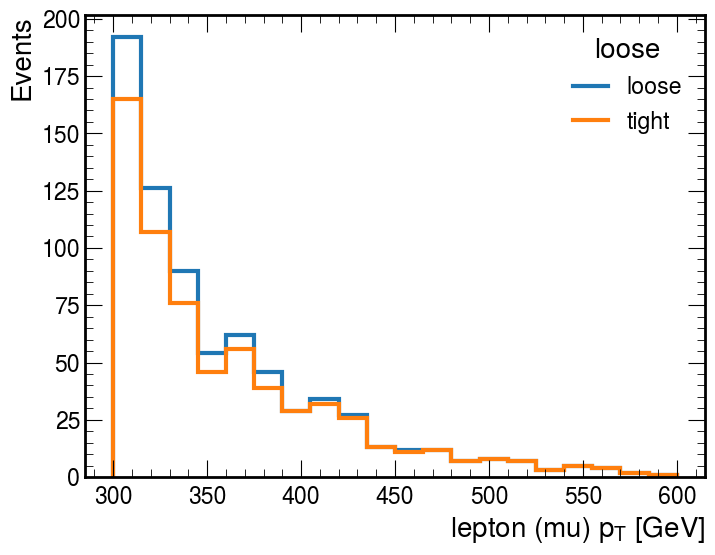

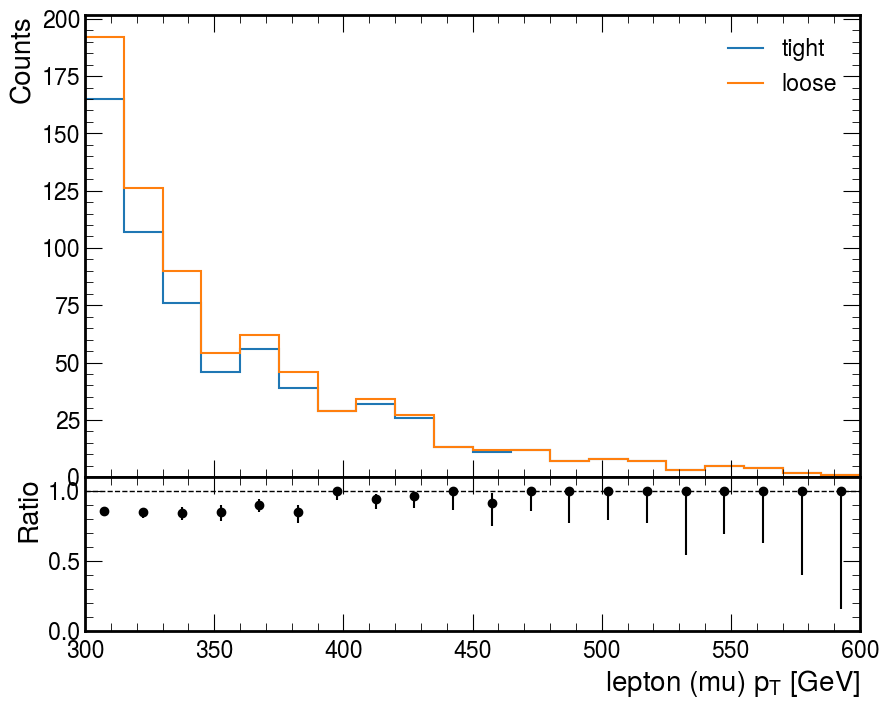

In [21]:
ch = 'mu'
h = hist2.Hist(hist2.axis.Regular(20, 300, 600, name="var", label=r"lepton (mu) $p_T$ [GeV]", overflow=True))
h1 = hist2.Hist(hist2.axis.Regular(20, 300, 600, name="var", label=r"lepton (mu) $p_T$ [GeV]", overflow=True))
#h2 = hist2.Hist(hist2.axis.Regular(20, 300, 600, name="var", label=r"lepton (mu) $p_T$ [GeV]", overflow=True))

#h.fill( var=np.abs(df_MC_tight["lep_pt"]),weight=df_MC_tight["event_weight"] )  
#h1.fill( var=np.abs(df_Data_Tight["lep_pt"]),weight=df_Data_Tight["event_weight"]) 


h.fill( var=np.abs(df_Data_Tight["lep_pt"]),weight=df_Data_Tight["event_weight"] )  
h1.fill( var=np.abs(df_Data_loose["lep_pt_loose"]),weight=df_Data_loose["event_weight"]) 


fig, ax = plt.subplots(figsize=(8, 6))

hep.histplot(
    h1,    ax=ax,    label='loose',
    linewidth=3,)#    density=True)

hep.histplot(
  h,    ax=ax,    label='tight',
    linewidth=3,)#    density=True)


ax.legend(title=f"Semi-Leptonic Channel: 2018 Data")
ax.set_ylabel("Events");  

ax.legend(title=f"loose")
ax.set_ylabel("Events"); 

fig = plt.figure(figsize=(10, 8))
main_ax_artists, sublot_ax_arists = h.plot_ratio(
    h1,
    rp_ylabel=r"Ratio",
    rp_num_label="tight", #numerator is a subset of the denominator
    rp_denom_label="loose",
    rp_uncert_draw_type="line",  # line or bar, 
    rp_uncertainty_type="efficiency", #https://hist.readthedocs.io/_/downloads/en/latest/pdf/
)